In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Utils
from src.utils.analysis_basics.check_gen_deadlines import plotfig_empirical_flow_budget_distributions

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

pd.set_option('display.min_rows', 21)
pd.set_option('display.max_rows', 25)


# I. Deadlines

In [11]:
from decimal import Decimal
from src.domain.Collection import LiveJobCollection
from src.DataEnrichment import DataEnrichment
from src.domain.Query import JobQuery


jobs = JobQuery.get_by_max_bottleneck_utilization(Decimal("0.85"))
jobs_collection = LiveJobCollection(jobs)
jobs_collection.to_jobs_dataframe()

,Job,Routing_ID,Arrival,Ready Time,Deadline
0,01-08500-0000,01-07,0,1440,None
1,01-08500-0016,01-07,1504,2880,None
2,01-08500-0029,01-07,2352,2880,None
3,01-08500-0034,01-07,2791,2880,None
4,01-08500-0047,01-07,3513,4320,None
5,01-08500-0053,01-07,3949,4320,None
6,01-08500-0060,01-07,4307,4320,None
7,01-08500-0079,01-07,5184,5760,None
8,01-08500-0083,01-07,5671,5760,None
9,01-08500-0093,01-07,6361,7200,None


## A) Simulation

In [4]:
simulation = ProductionSimulation(sigma = 0, verbose = False, with_earliest_start=True)
simulation.run(jobs_collection, start_time = 0, end_time = None)

In [6]:
finished_operations = simulation.get_finished_operation_collection()
df_fcfs = finished_operations.to_operations_dataframe()
df_fcfs


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,01-08500-0000,01-07,0,M01-02,1440.0,31.0,1471.0,1440,None
1,01-08500-0000,01-07,1,M01-00,1707.0,86.0,1793.0,1440,None
2,01-08500-0000,01-07,2,M01-01,2183.0,46.0,2229.0,1440,None
3,01-08500-0000,01-07,3,M01-05,2229.0,74.0,2303.0,1440,None
4,01-08500-0000,01-07,4,M01-04,2366.0,32.0,2398.0,1440,None
5,01-08500-0000,01-07,5,M01-06,2475.0,88.0,2563.0,1440,None
6,01-08500-0000,01-07,6,M01-08,2658.0,19.0,2677.0,1440,None
7,01-08500-0000,01-07,7,M01-09,2677.0,48.0,2725.0,1440,None
8,01-08500-0000,01-07,8,M01-07,2934.0,36.0,2970.0,1440,None
9,01-08500-0000,01-07,9,M01-03,2970.0,79.0,3049.0,1440,None


In [9]:
#if day_count <= 5:
#    gantt.get_plot(df_fcfs_execution, perspective="Machine")

In [7]:
df_jobs_times_temp = finished_operations.to_last_ops_dataframe()
df_jobs_times_temp


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
0,01-08500-0000,01-07,9,M01-03,2970.0,79.0,3049.0,1440,None,539.0
1,01-08500-0002,01-01,9,M01-08,2683.0,30.0,2713.0,1440,None,510.0
2,01-08500-0001,01-06,9,M01-04,2108.0,55.0,2163.0,1440,None,416.0
3,01-08500-0015,01-01,9,M01-08,2755.0,30.0,2785.0,1440,None,510.0
4,01-08500-0010,01-06,9,M01-04,2311.0,55.0,2366.0,1440,None,416.0
5,01-08500-0003,01-05,9,M01-07,2804.0,25.0,2829.0,1440,None,496.0
6,01-08500-0006,01-00,9,M01-09,2978.0,21.0,2999.0,1440,None,395.0
7,01-08500-0004,01-04,9,M01-06,2876.0,53.0,2929.0,1440,None,393.0
8,01-08500-0013,01-04,9,M01-06,2950.0,53.0,3003.0,1440,None,393.0
9,01-08500-0005,01-02,9,M01-04,2615.0,33.0,2648.0,1440,None,568.0


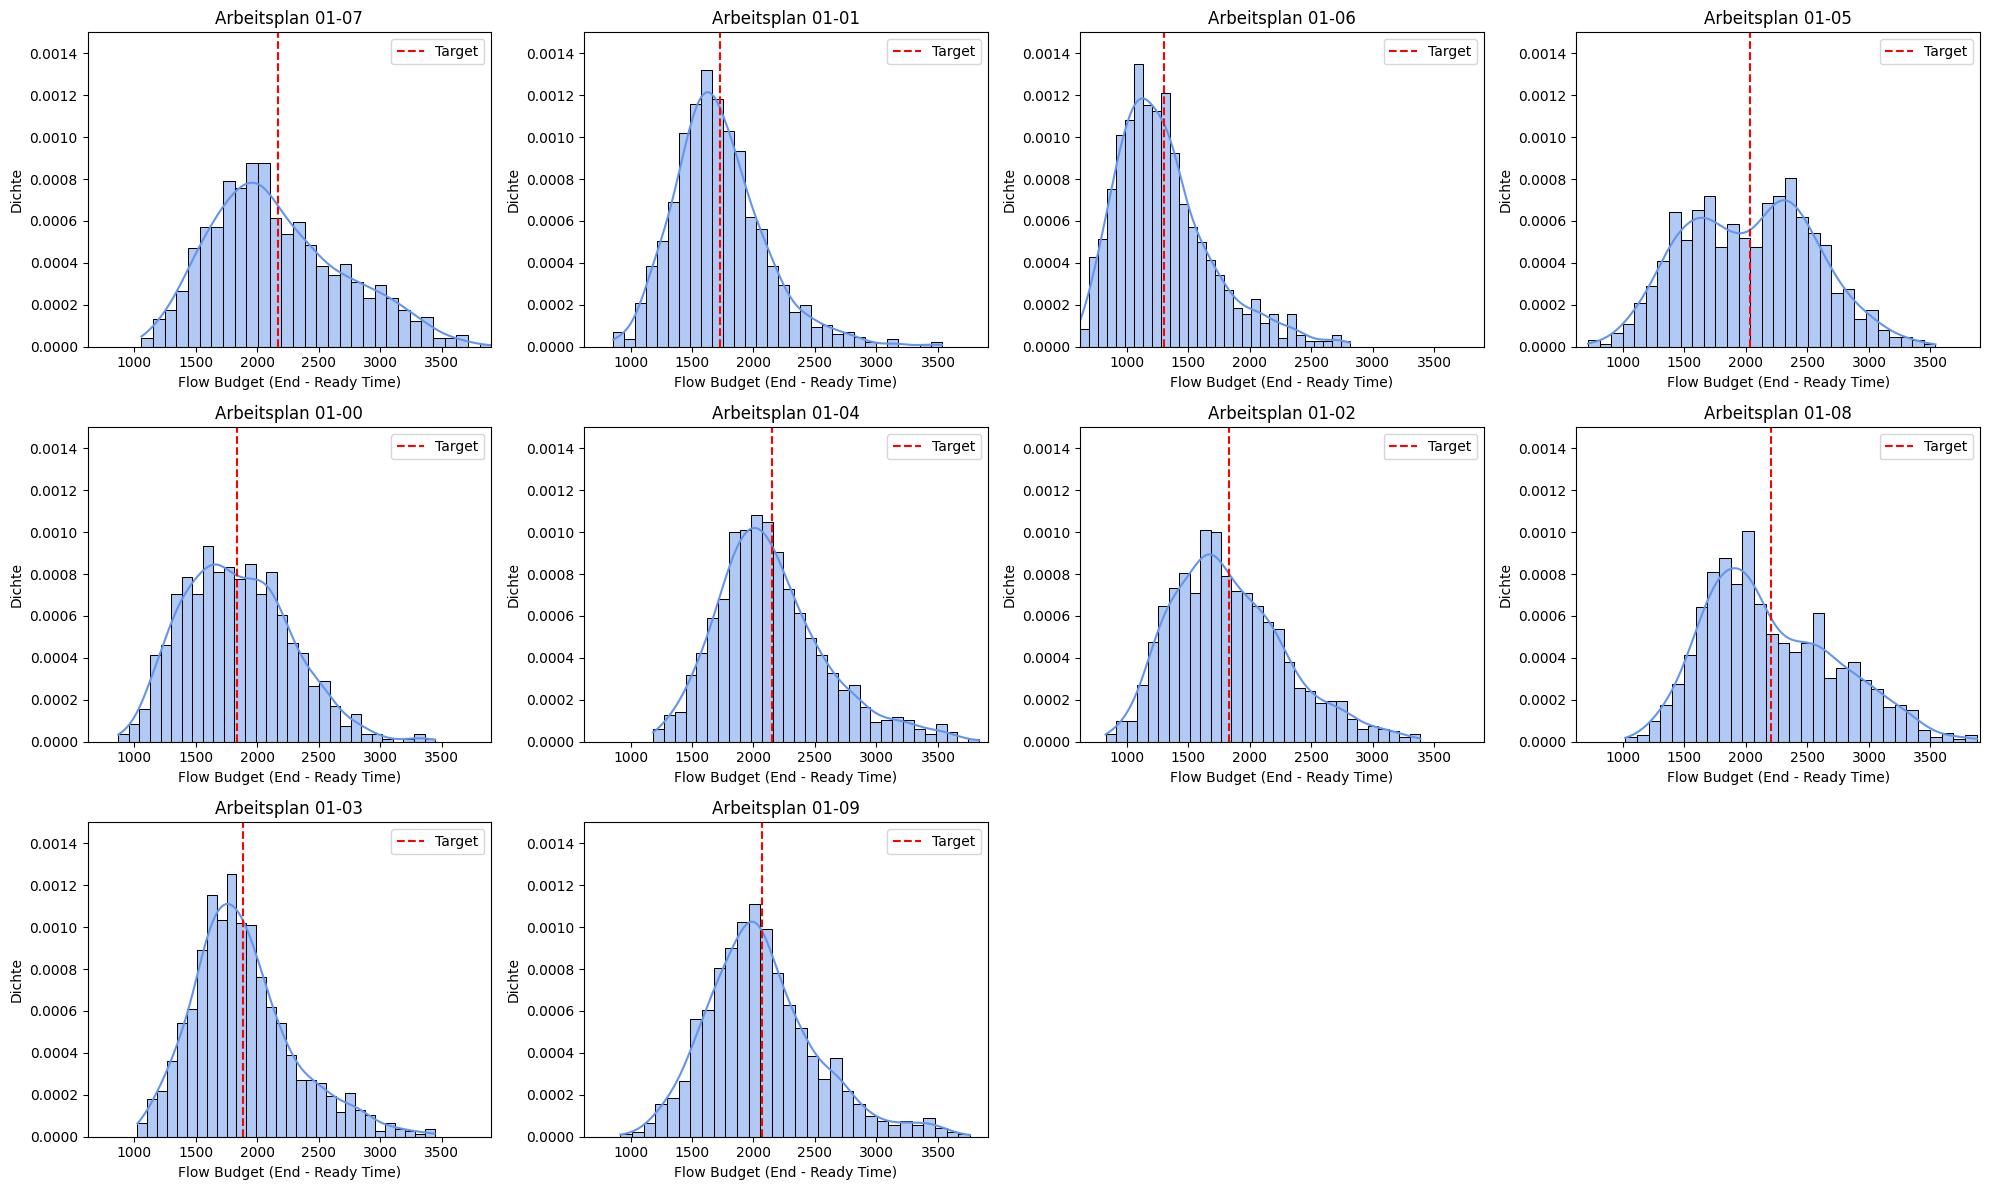

In [9]:
plotfig_empirical_flow_budget_distributions(df_jobs_times_temp, deadline_column="End", y_max=0.0015)
plt.show()

## B) Generation of deadlines using log-normal distribution

In [10]:
df_jobs_times = DataEnrichment.add_groupwise_lognormal_deadlines_by_group_mean(df_jobs_times_temp, sigma=0.25)
df_jobs_times

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
0,01-08500-0000,01-07,9,M01-03,2970.0,79.0,3049.0,1440,3296.0,539.0
1,01-08500-0002,01-01,9,M01-08,2683.0,30.0,2713.0,1440,3773.0,510.0
2,01-08500-0001,01-06,9,M01-04,2108.0,55.0,2163.0,1440,2330.0,416.0
3,01-08500-0015,01-01,9,M01-08,2755.0,30.0,2785.0,1440,3198.0,510.0
4,01-08500-0010,01-06,9,M01-04,2311.0,55.0,2366.0,1440,2738.0,416.0
5,01-08500-0003,01-05,9,M01-07,2804.0,25.0,2829.0,1440,3091.0,496.0
6,01-08500-0006,01-00,9,M01-09,2978.0,21.0,2999.0,1440,3453.0,395.0
7,01-08500-0004,01-04,9,M01-06,2876.0,53.0,2929.0,1440,4098.0,393.0
8,01-08500-0013,01-04,9,M01-06,2950.0,53.0,3003.0,1440,2917.0,393.0
9,01-08500-0005,01-02,9,M01-04,2615.0,33.0,2648.0,1440,3578.0,568.0


####  Plot of the new deadlines

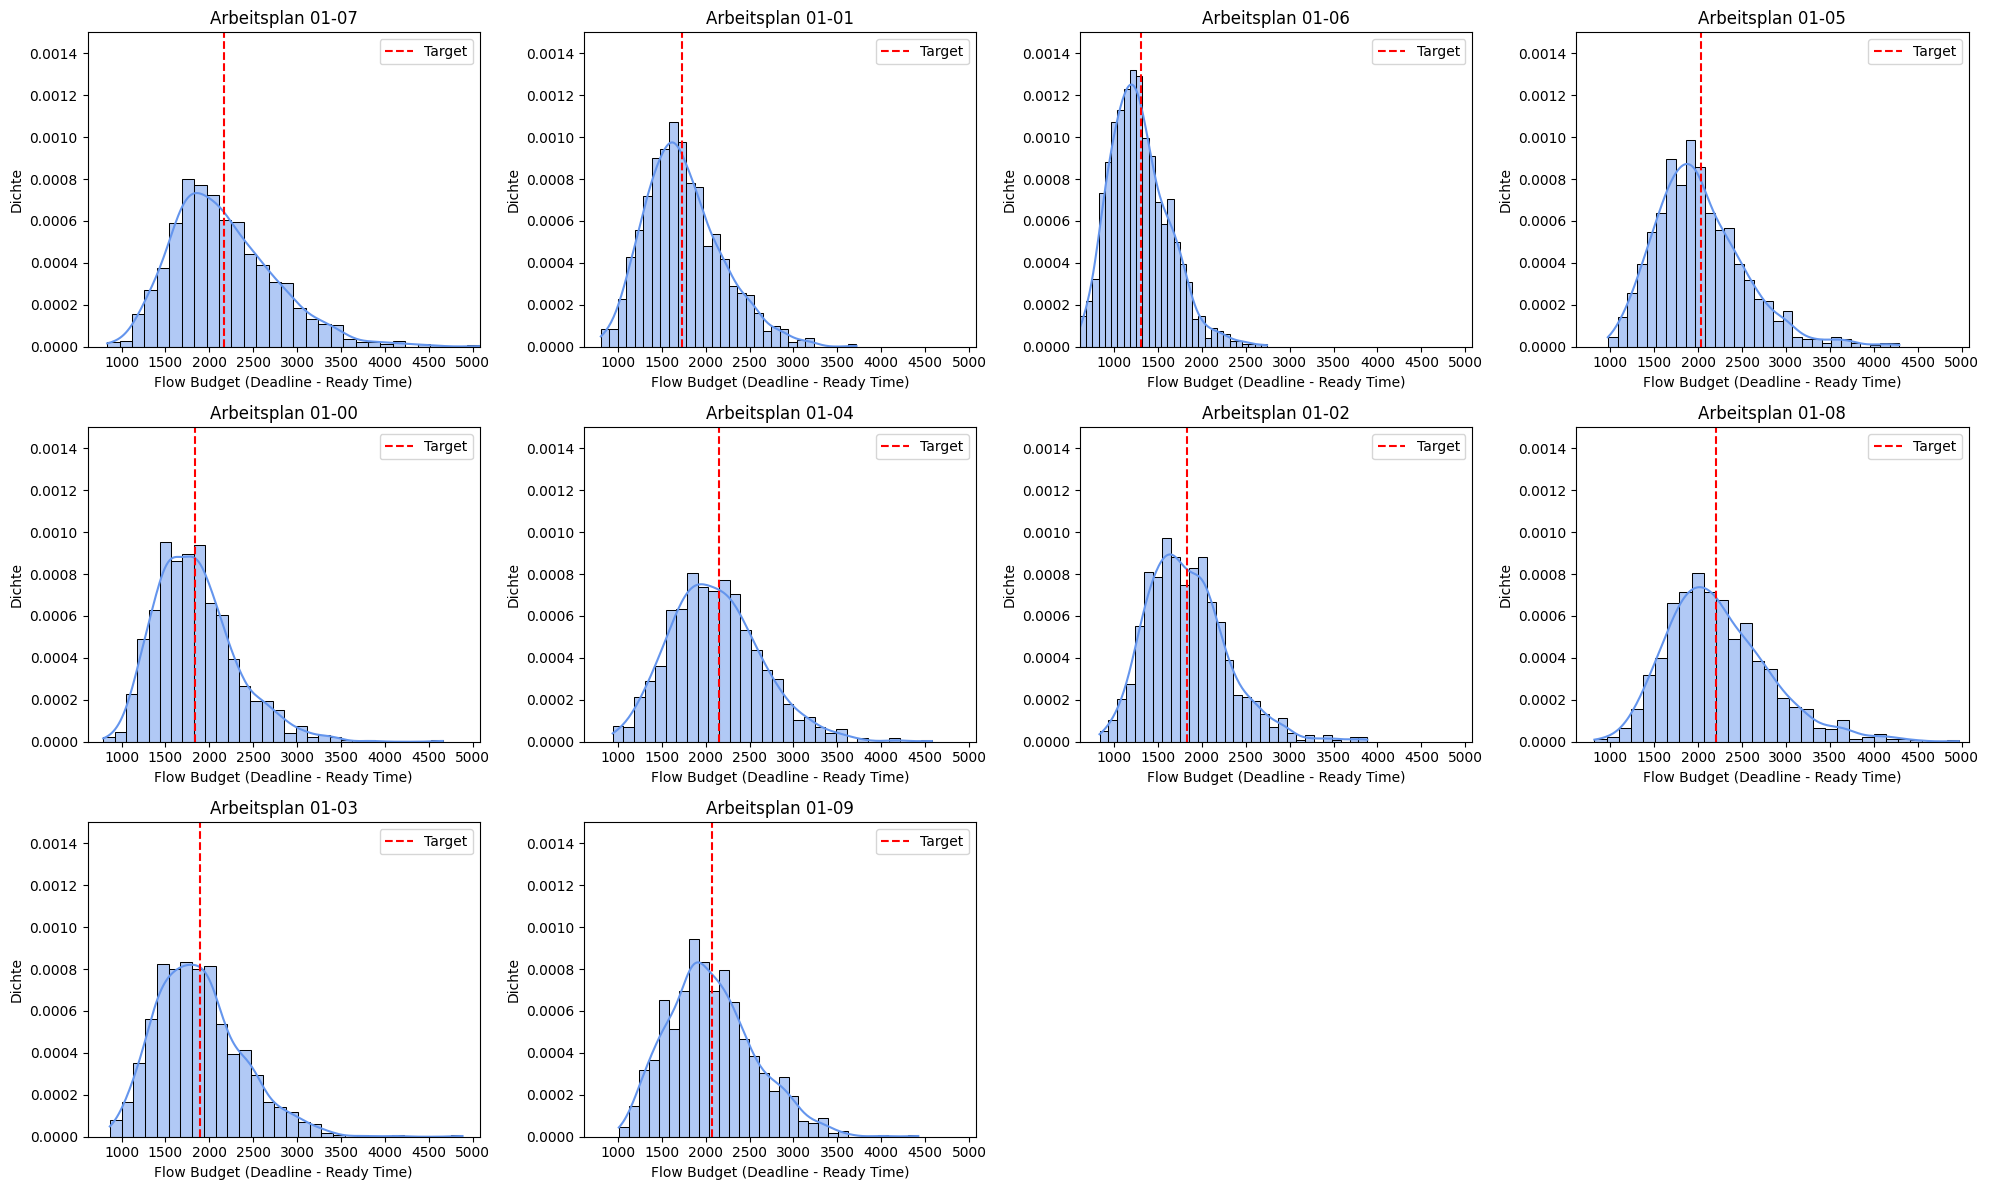

In [13]:
plotfig_empirical_flow_budget_distributions(df_jobs_times, y_max=0.0015)
plt.show()

#### Ensuring that the processing time is achievable to a certain extent in the best-case scenario

In [15]:
# min. 100 % of processing time for each job is covered in best-case
df_jobs_times_final = DataEnrichment.ensure_reasonable_deadlines(df_jobs_times, min_coverage = 1.0)

diff_count = (df_jobs_times_final["Deadline"] > df_jobs_times["Deadline"]).sum()

# Info: Compare the "Deadline" column
print(f"Number of different entries in 'Deadline': {diff_count}")

df_jobs_times_final

Number of different entries in 'Deadline': 0


,Job,Routing_ID,Operation,Machine,Start,Processing Time,Ready Time,Deadline,Total Processing Time
0,01-08500-0000,01-07,9,M01-03,2970.0,79.0,1440,3296,539.0
1,01-08500-0002,01-01,9,M01-08,2683.0,30.0,1440,3773,510.0
2,01-08500-0001,01-06,9,M01-04,2108.0,55.0,1440,2330,416.0
3,01-08500-0015,01-01,9,M01-08,2755.0,30.0,1440,3198,510.0
4,01-08500-0010,01-06,9,M01-04,2311.0,55.0,1440,2738,416.0
5,01-08500-0003,01-05,9,M01-07,2804.0,25.0,1440,3091,496.0
6,01-08500-0006,01-00,9,M01-09,2978.0,21.0,1440,3453,395.0
7,01-08500-0004,01-04,9,M01-06,2876.0,53.0,1440,4098,393.0
8,01-08500-0013,01-04,9,M01-06,2950.0,53.0,1440,2917,393.0
9,01-08500-0005,01-02,9,M01-04,2615.0,33.0,1440,3578,568.0


## C) Update DB

In [16]:
JobQuery.update_job_deadlines_from_df(
    df = df_jobs_times_final,
    job_column="Job",
    deadline_column = "Deadline"
)

# II. Transition Time

In [17]:
df_fcfs

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,01-08500-0000,01-07,0,M01-02,1440.0,31.0,1471.0,1440,None
1,01-08500-0000,01-07,1,M01-00,1707.0,86.0,1793.0,1440,None
2,01-08500-0000,01-07,2,M01-01,2183.0,46.0,2229.0,1440,None
3,01-08500-0000,01-07,3,M01-05,2229.0,74.0,2303.0,1440,None
4,01-08500-0000,01-07,4,M01-04,2366.0,32.0,2398.0,1440,None
5,01-08500-0000,01-07,5,M01-06,2475.0,88.0,2563.0,1440,None
6,01-08500-0000,01-07,6,M01-08,2658.0,19.0,2677.0,1440,None
7,01-08500-0000,01-07,7,M01-09,2677.0,48.0,2725.0,1440,None
8,01-08500-0000,01-07,8,M01-07,2934.0,36.0,2970.0,1440,None
9,01-08500-0000,01-07,9,M01-03,2970.0,79.0,3049.0,1440,None


In [18]:
def compute_transition_times_backward(
    df_schedule: pd.DataFrame, job_column:str = "Job", position_number_column: str = "Operation",
    start_column: str = "Start", end_column: str = "End", new_transition_column: str = "Transition_Time"):
    """
    Vektorisierte Berechnung der Übergangszeiten bei Rückwärtsterminierung.
    Deutlich schneller als die Schleifenvariante.
    
    Erwartet: ['Job', 'Operation', 'Start', 'End']
    """
    df = df_schedule.copy()
    df = df.sort_values([job_column, position_number_column], ascending=[True, False])

    df['End_Previous_Op'] = df.groupby(job_column)[end_column].shift(-1)

    # Übergangszeit: Start dieser Op – Ende der vorheruíger Operation
    df[new_transition_column] = df[start_column] - df['End_Previous_Op']

    #df.drop(columns=''End_Previous_Op', inplace=True)
    return df

df_jobs_transition_times = compute_transition_times_backward(df_fcfs)
df_jobs_transition_times     

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,End_Previous_Op,Transition_Time
9,01-08500-0000,01-07,9,M01-03,2970.0,79.0,3049.0,1440,None,2970.0,0.0
8,01-08500-0000,01-07,8,M01-07,2934.0,36.0,2970.0,1440,None,2725.0,209.0
7,01-08500-0000,01-07,7,M01-09,2677.0,48.0,2725.0,1440,None,2677.0,0.0
6,01-08500-0000,01-07,6,M01-08,2658.0,19.0,2677.0,1440,None,2563.0,95.0
5,01-08500-0000,01-07,5,M01-06,2475.0,88.0,2563.0,1440,None,2398.0,77.0
4,01-08500-0000,01-07,4,M01-04,2366.0,32.0,2398.0,1440,None,2303.0,63.0
3,01-08500-0000,01-07,3,M01-05,2229.0,74.0,2303.0,1440,None,2229.0,0.0
2,01-08500-0000,01-07,2,M01-01,2183.0,46.0,2229.0,1440,None,1793.0,390.0
1,01-08500-0000,01-07,1,M01-00,1707.0,86.0,1793.0,1440,None,1471.0,236.0
0,01-08500-0000,01-07,0,M01-02,1440.0,31.0,1471.0,1440,None,NaN,NaN


In [20]:
df_avg_transition_times = (
    df_jobs_transition_times
    .groupby('Machine')['Transition_Time']
    .mean().round(0).astype(int)
    .reset_index()
    .rename(columns={'Transition_Time': 'Avg_Transition_Time'})
)
df_avg_transition_times

,Machine,Avg_Transition_Time
0,M01-00,291
1,M01-01,467
2,M01-02,130
3,M01-03,184
4,M01-04,69
5,M01-05,85
6,M01-06,54
7,M01-07,97
8,M01-08,138
9,M01-09,31


In [ ]:
-

## Update DB

In [ ]:
RoutingQuery.update_operations_with_theoretical_transition_times_from_dataframe(df_avg_transitions)

### ____________________________________________________________________________________

In [ ]:
df_max_transition_per_routing = (
    df_avg_transitions
    .groupby("Routing_ID")["Avg_Transition_Time"]
    .max()
    .reset_index()
    .rename(columns={"Avg_Transition_Time": "Max_Avg_Transition_Time"})
)
df_max_transition_per_routing